In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

In [19]:
digits = load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

vado a stampare un immagine per ogni classe

In [20]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [21]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [22]:
X = digits.data
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape

(1257, 64)

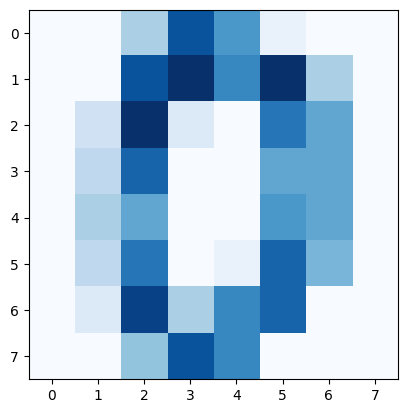

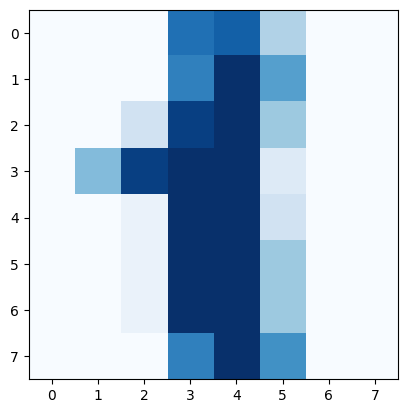

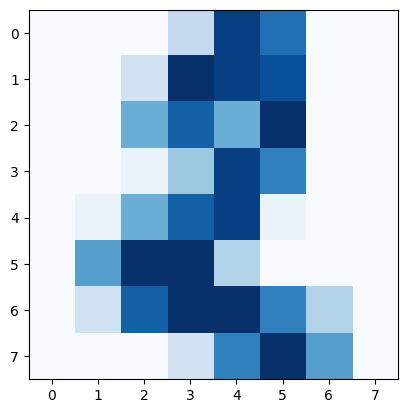

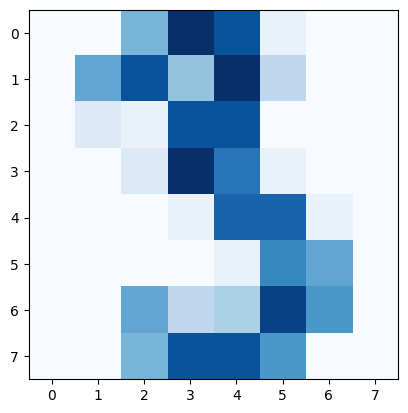

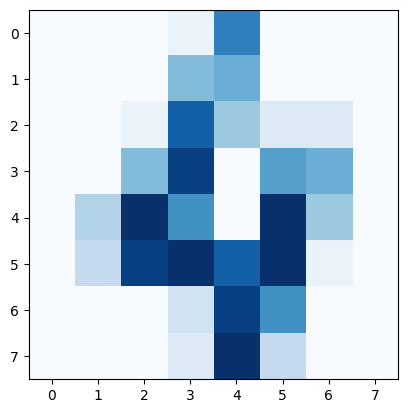

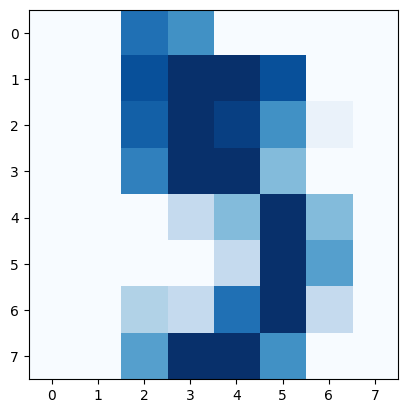

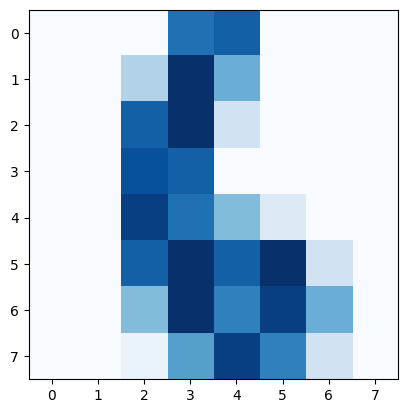

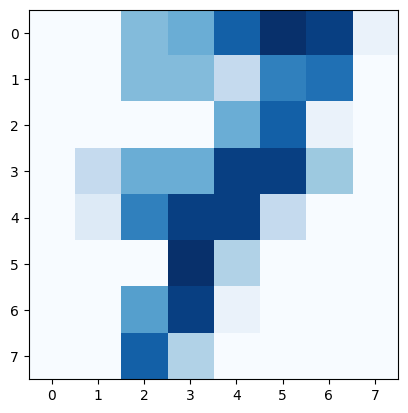

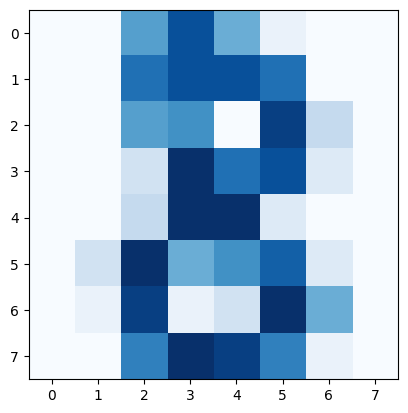

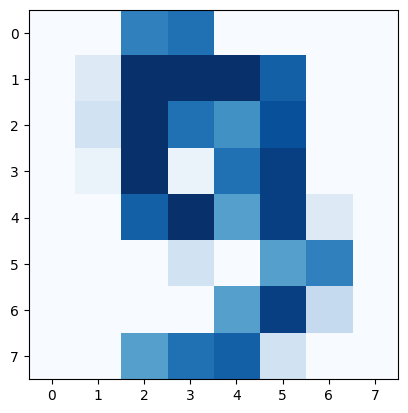

In [23]:
for i in range(0,10):
  pic_matrix = X[Y == i][0].reshape([8,8])
  
  plt.imshow(pic_matrix, cmap="Blues")
  plt.show()

ora vedo un immagine per elemento

prima di addestrare scalo i colori

In [24]:
mms = MinMaxScaler()

mms.fit_transform(X_train)
mms.transform(X_test)

array([[0.    , 0.    , 0.6875, ..., 0.8125, 1.    , 0.5   ],
       [0.    , 0.125 , 0.9375, ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.25  , 0.8125, ..., 1.    , 1.    , 0.1875],
       ...,
       [0.    , 0.    , 0.    , ..., 0.9375, 0.0625, 0.    ],
       [0.    , 0.    , 0.5   , ..., 0.125 , 0.    , 0.    ],
       [0.    , 0.    , 0.0625, ..., 0.6875, 0.0625, 0.    ]],
      shape=(540, 64))

ora creo la regressione logistica

In [25]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [26]:
#verifico il train set

print('verifico il train set')
print(f'accuracy score{accuracy_score(y_train, lr.predict(X_train))}')
print(f'log loss {log_loss(y_test, lr.predict_proba(X_test))}')

verifico il train set
accuracy score1.0
log loss 0.14803689500603592


In [27]:

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)

accuracy_logregression = accuracy_score(y_test, y_pred)
logloss_logregression = log_loss(y_test, y_pred_proba)

#calcolo accuratezza e log_loss
print(f'accuracy score {accuracy_logregression}')
print(f'log_loss {logloss_logregression}')

accuracy score 0.9518518518518518
log_loss 0.14803689500603592


un altro esperimeto fattibile è usare il modello OneVsRestClassifier di sklearn

In [28]:
ovsrc = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovsrc.fit(X_train, y_train)


,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [29]:
#verifico il train set

print('verifico il train set')
print(f'accuracy score{accuracy_score(y_train, ovsrc.predict(X_train))}')
print(f'log loss {log_loss(y_test, ovsrc.predict_proba(X_test))}')

verifico il train set
accuracy score0.9976133651551312
log loss 0.20757171976818298


In [30]:
ovsrc = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovsrc.fit(X_train, y_train)

y_pred_ovsrc = ovsrc.predict(X_test)
y_pred_proba_ovsrc = ovsrc.predict_proba(X_test)

accuracy_oneVsRest  = accuracy_score(y_test, y_pred_ovsrc)
logloss_oneVsRest  = log_loss(y_test, y_pred_proba_ovsrc)

#calcolo accuratezza e log_loss
print('------------- one vs all --------')

print(f'accuracy score {accuracy_oneVsRest}')
print(f'log_loss {logloss_oneVsRest}')

print('-------------log regression --------')

print(f'accuracy score {accuracy_logregression}')
print(f'log_loss {logloss_logregression}')

print('----------------------------------')


------------- one vs all --------
accuracy score 0.95
log_loss 0.20757171976818298
-------------log regression --------
accuracy score 0.9518518518518518
log_loss 0.14803689500603592
----------------------------------


Dai risultati ricevuti l'errore sembra essere minimale e la regressione sembra essere leggermente piu performante della onevsAll, di conseguenza sceglierò la regressione.
Nei prossimi farò un analisi per comprendere quali errori ci sono stati

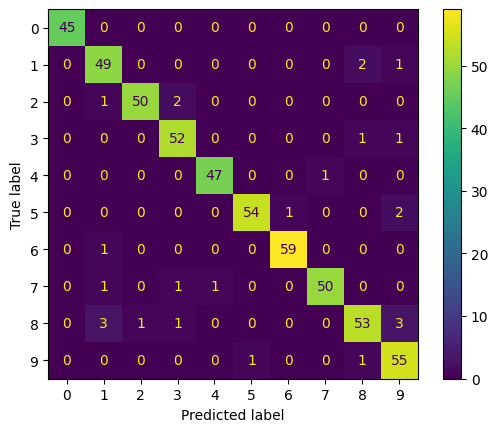

In [31]:
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1,2,3,4,5,6,7,8,9]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(values_format='d')
plt.show()

In [32]:
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 50,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  1,  0,  1,  1,  0,  0, 50,  0,  0],
       [ 0,  3,  1,  1,  0,  0,  0,  0, 53,  3],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 55]])

In [33]:
errors = []
for i in range(0,10):
  total = cm[i,:].sum()
  correct = cm[i,i]
  errors.append([i, 100*(total - correct)/total])

errors.sort(key=lambda x: x[1], reverse=True)
errors

[[8, np.float64(13.114754098360656)],
 [1, np.float64(5.769230769230769)],
 [2, np.float64(5.660377358490566)],
 [7, np.float64(5.660377358490566)],
 [5, np.float64(5.2631578947368425)],
 [3, np.float64(3.7037037037037037)],
 [9, np.float64(3.508771929824561)],
 [4, np.float64(2.0833333333333335)],
 [6, np.float64(1.6666666666666667)],
 [0, np.float64(0.0)]]

da quel che posso vedere l'errore più comune arriva nell'8 che è stato scambiato una volta per 9, una volta per 3 e 2 volte per 2

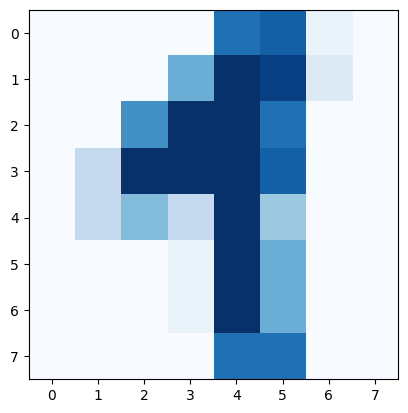

predicted: 9, value: 5
----------------------------------------------------------------------


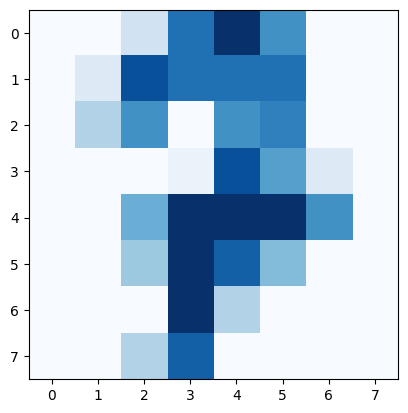

predicted: 4, value: 7
----------------------------------------------------------------------


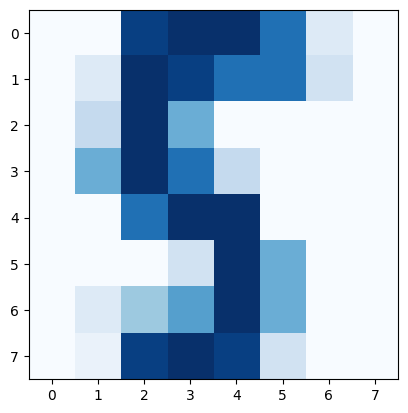

predicted: 1, value: 7
----------------------------------------------------------------------


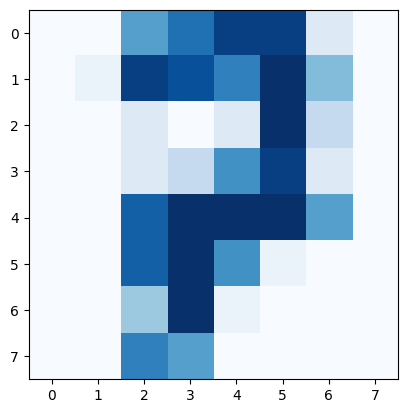

predicted: 1, value: 6
----------------------------------------------------------------------


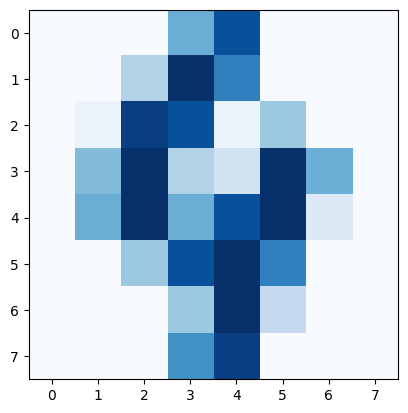

predicted: 1, value: 8
----------------------------------------------------------------------


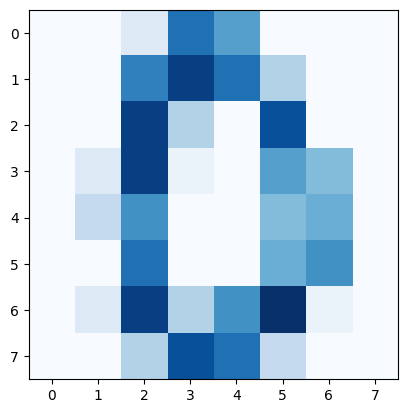

predicted: 5, value: 9
----------------------------------------------------------------------


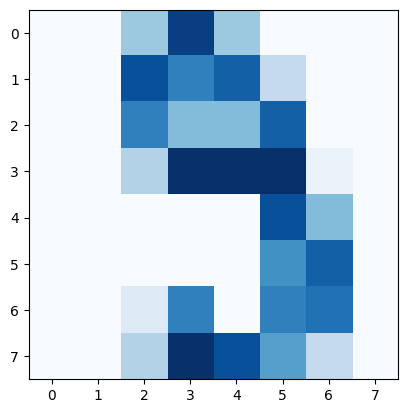

predicted: 3, value: 8
----------------------------------------------------------------------


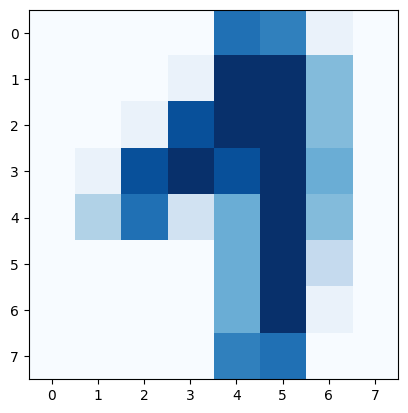

predicted: 9, value: 8
----------------------------------------------------------------------


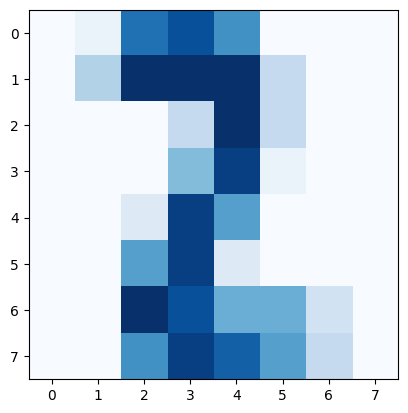

predicted: 9, value: 5
----------------------------------------------------------------------


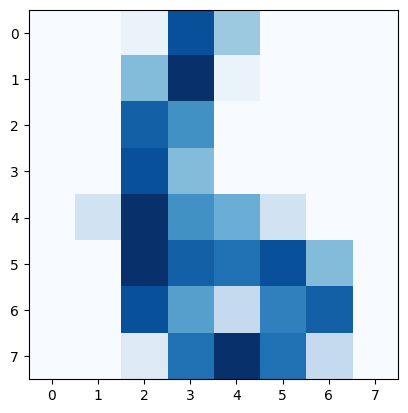

predicted: 1, value: 8
----------------------------------------------------------------------


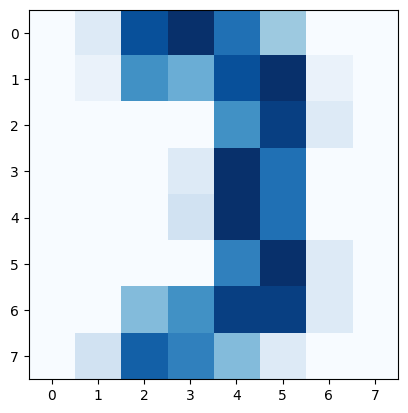

predicted: 8, value: 1
----------------------------------------------------------------------


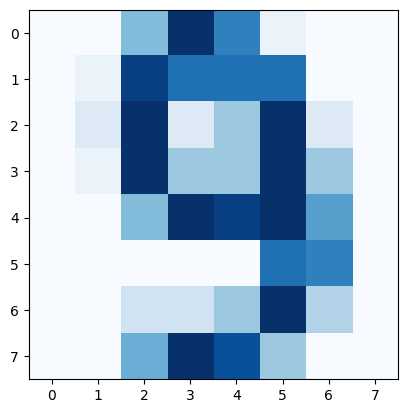

predicted: 3, value: 2
----------------------------------------------------------------------


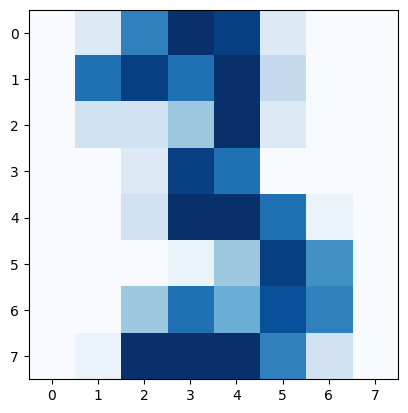

predicted: 7, value: 4
----------------------------------------------------------------------


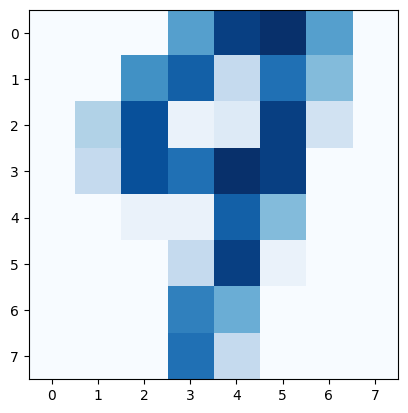

predicted: 9, value: 1
----------------------------------------------------------------------


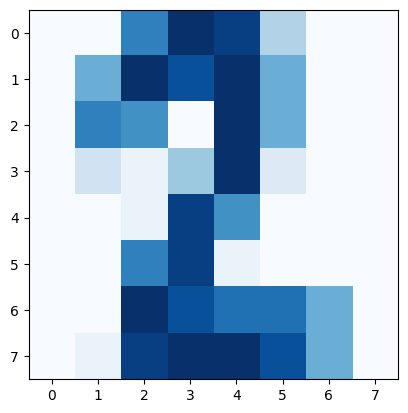

predicted: 8, value: 1
----------------------------------------------------------------------


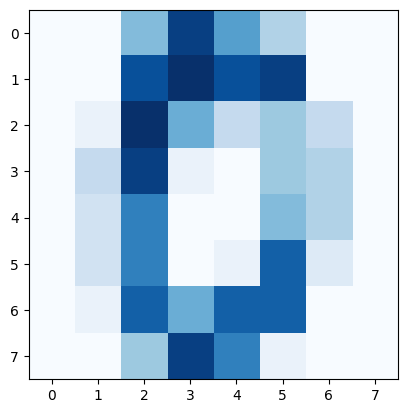

predicted: 2, value: 8
----------------------------------------------------------------------


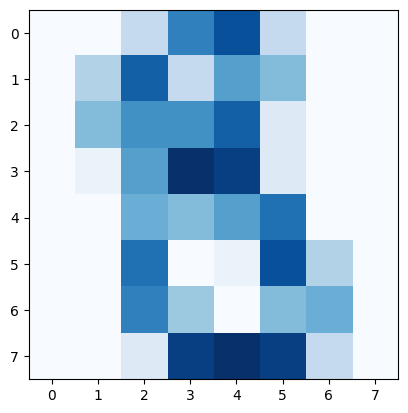

predicted: 8, value: 3
----------------------------------------------------------------------


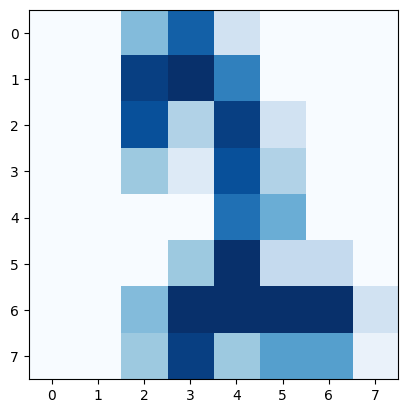

predicted: 1, value: 8
----------------------------------------------------------------------


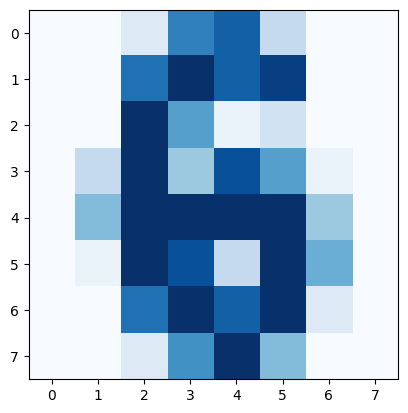

predicted: 9, value: 8
----------------------------------------------------------------------


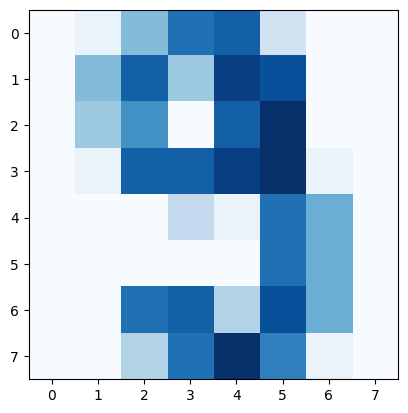

predicted: 3, value: 7
----------------------------------------------------------------------


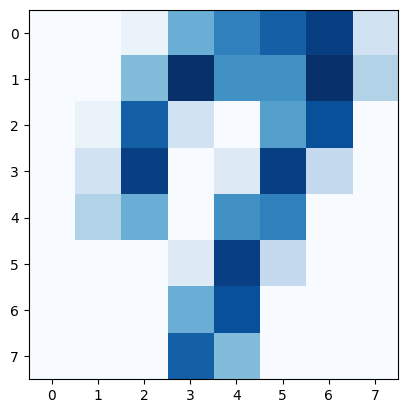

predicted: 8, value: 9
----------------------------------------------------------------------


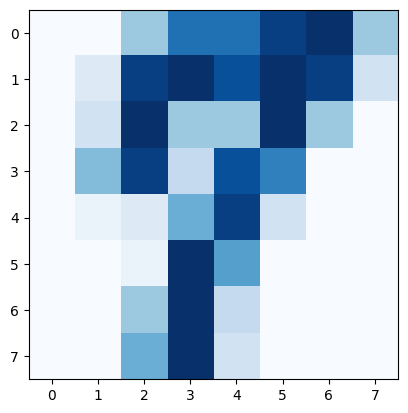

predicted: 9, value: 3
----------------------------------------------------------------------


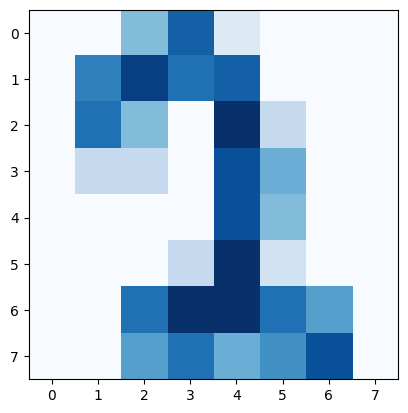

predicted: 3, value: 2
----------------------------------------------------------------------


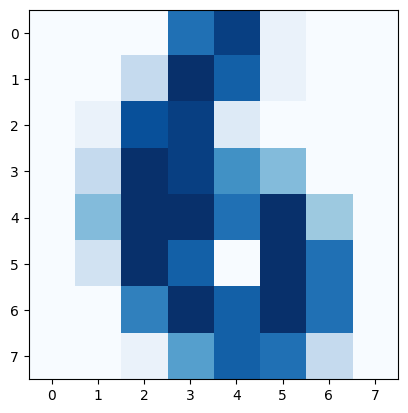

predicted: 9, value: 8
----------------------------------------------------------------------


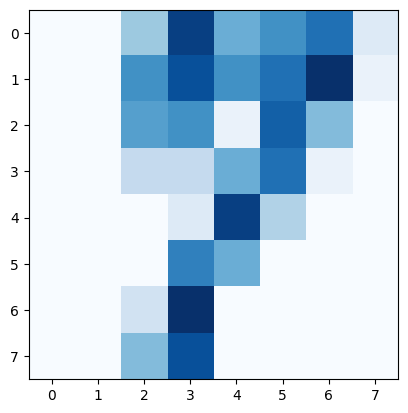

predicted: 6, value: 5
----------------------------------------------------------------------


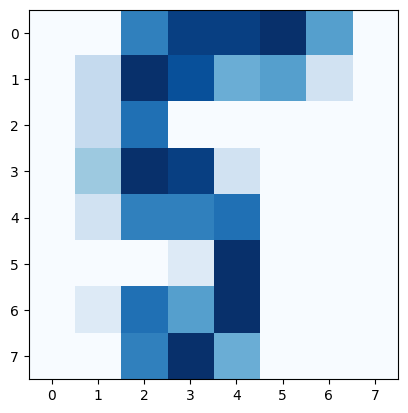

predicted: 1, value: 2
----------------------------------------------------------------------


In [34]:
# print(np.where(y_pred != y_test))
for i in np.where(y_pred != y_test)[0]:
  pic_matrix = X[i].reshape([8,8])
  plt.imshow(pic_matrix, cmap="Blues")
  plt.show()
  print(f'predicted: {y_pred[i]}, value: {y_test[i]}')
  print('----------------------------------------------------------------------')

molti degli errori in effetti erano dubbi anche all'occhio umano